In [16]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

boston = load_boston()

In [17]:
columns = ['target'] + list(boston.feature_names)

df = pd.DataFrame(data=np.c_[boston.target, boston.data],
                  columns=columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   target   506 non-null    float64
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    float64
 5   NOX      506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    float64
 10  TAX      506 non-null    float64
 11  PTRATIO  506 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [20]:
X = df.drop(columns = 'target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
df.corr()

,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
target,1.000000,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


In [21]:
disco_dancer = LinearRegression()
disco_dancer.fit(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [24]:
print('Веса всех признаков: ', disco_dancer.coef_)
print('Свободный коэффицент уравнения w0:', disco_dancer.intercept_)

Веса всех признаков:  [-8.68199380e-02  4.10143636e-02  1.15042082e-01  2.36912178e+00
 -1.42055754e+01  3.28866781e+00 -9.03885225e-03 -9.65045625e-01
  2.40394601e-01 -1.06659950e-02 -1.32124709e+00  5.67599459e-03
 -5.39753262e-01]
Свободный коэффицент уравнения w0: 43.572726079063884


Уравнение: y = 43.57 - 0.087 * CRIM + 0.041 * ZN + 0.12 * INDUS + 2.37 * CHAS - 14.2 * NOX + 3.29 * RM - 0.00903 * AGE - 0.965 * DIS + 0.24 * RAD - 0.011 * TAX - 1.32 * PTRATIO + 0.0057 * B - 0.54 * LSTAT

In [41]:
#Визуализацию сделаем от RM, что бы оно не значило
x = df[["RM"]]
Y = df['target']
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3)

rocknroll_dancer = LinearRegression()
rocknroll_dancer.fit(x_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [42]:
y_pred = rocknroll_dancer.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


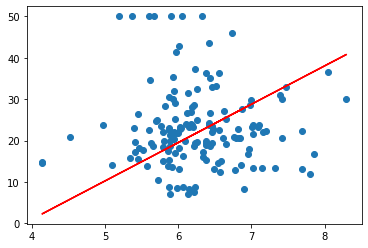

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(x_test, y_test)
ax.plot(x_test, y_pred, color = 'red')
#Слева фактические данные, справа регрессия

In [44]:
mse = 0
rocknroll = list(y_test)
for i in range(len(y_pred)):
  mse += (y_pred[i] - rocknroll[i]) ** 2

mse / len(y_pred)

131.26625093972058

In [46]:
print('mae:', mean_absolute_error(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

mae: 8.414250782879938
mse: 131.26625093972058
R2 score: -0.4405170312955684
